<a href="https://colab.research.google.com/github/sanketchavan5595/Task-1/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1 : PREDICTION USING SUPERVISED MACHINE LEARNING
## OBJECTIVE : Predict the percentage of student based on the number of study hours
### Author: Sanket Chavan



---



### **Importing the required libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
dataset_url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(dataset_url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes




---



### **checking for null values**

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64



---



### **Let's plot the graph using matplotlib and seaborn**

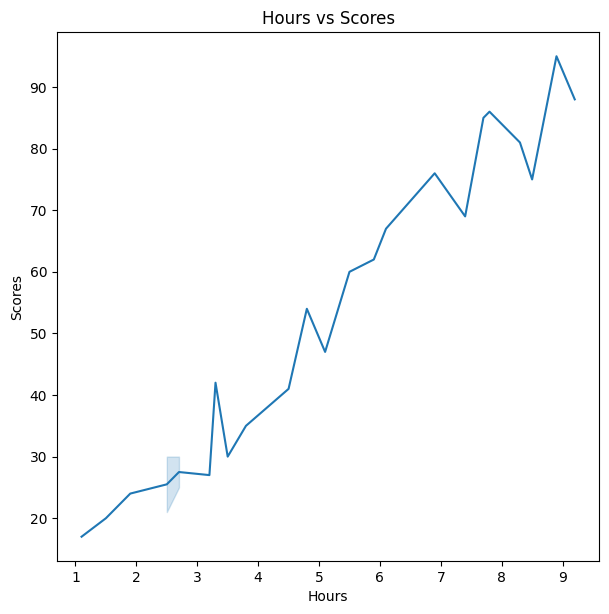

In [7]:
plt.figure(figsize = (7,7), dpi = 100)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
sns.lineplot(x = 'Hours', 
             y = 'Scores', 
             data = df);

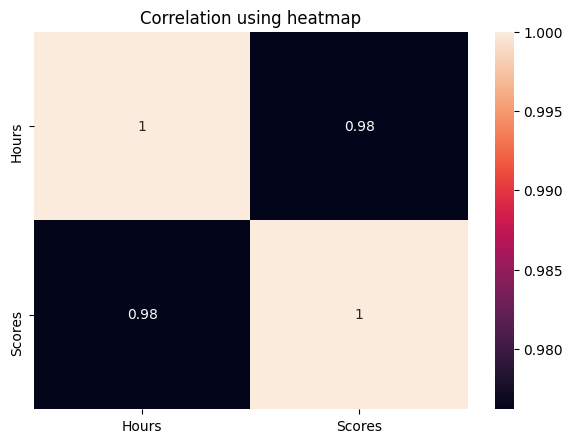

In [8]:
plt.figure(figsize= (7,5), dpi = 100)
plt.title('Correlation using heatmap')
sns.heatmap(df.corr(), annot= True);

**There is very high positive correlation (0.98) between the number of hours, the student studies and the scores**



---



### **Model Building**
**Splitting the data using `train_test_split`**

In [9]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state = 0)

**Let's use the Linear Regression from `sklearn.linear_model` to predict the scores**

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [11]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
regressor.coef_[0]

9.690624690624697

In [13]:
regressor.intercept_

2.5069547569547197



---



### **Predicting the scores using the trained model**

In [14]:
y_preds = regressor.predict(X_test)

In [15]:
y_preds

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

#### **What will be predicted score if a student studies for 9.25 hrs/ day?** 
**Let's find out...**

In [16]:
## let's predict the score if the student studies for 9.25 hours 
hrs = 9.25
predicted_score = regressor.predict([[hrs]])
print("If the student studies for 9.25 hrs/day, then the score will be {}".format(predicted_score[0]))

If the student studies for 9.25 hrs/day, then the score will be 92.14523314523316


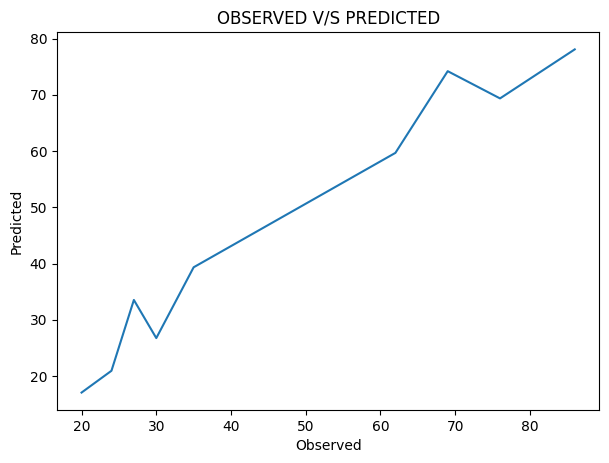

In [17]:
plt.figure(figsize = (7,5), dpi = 100)
plt.title('Observed v/s Predicted'.upper())
plt.xlabel('Observed')
plt.ylabel('Predicted')
sns.lineplot(x = y_test, 
             y = y_preds);



---



### **Model Evaluation**
**metrics used:**
* `mean_absolute_error`
* `mean_squared_error`

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)

print(f'The mean absolute error is {mae}')
print(f'the mean squared error is {mse}')

The mean absolute error is 4.691397441397446
the mean squared error is 25.463280738222593




---



---


# ***Thank you***
